# Regression Exercises

## Linear

In [ ]:
# Loading data
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn.linear_model as lm

# Read data from Github
data_url = "https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/NotebookExampleData/Week1/ex1data2.txt"
data_array = np.genfromtxt(data_url, delimiter=',')

# The columns in this data set are define as folows:
"""
    0 = floor area
    1 = number of bedrooms
    2 = sale price
"""
    
# Store the relevant columns in more descriptive variables
x_sqft = data_array[:,0]
#print(len(y_value))ray[:,0]
y_value = data_array[:,2]
z_value = data_array[:,1]



Here we'll build off of the tutorial exercise, first finding the best linear fit for floor area (sqft) vs valued price (USD). Recall that setting the derivative = 0 and solving for 𝑏 & 𝑚 produces formula for the best fit trend:
$$ m = \frac{\sum^n_{i=1} (x_i-x_{mean})(y_i-y_{mean})}{\sum^n_{i=1} (x_i-x_{mean})^2} $$
$$ b = y_{mean}-m*x_{mean} $$

In [ ]:
def find_best_fit(xx,yy):
    '''
      This function finds the best linear fit for yy vs xx
    '''
  
    # YOUR CODE HERE
    model = lm.LinearRegression()
    xx_shaped = xx.reshape(-1,1)
    predictor = model.fit(xx_shaped, yy)
    return predictor.coef_[0], predictor.intercept_

In [ ]:
# Use your function to show the best fit values for our data
(mm, bb) = find_best_fit(x_sqft, y_value)
fit_str = 'y = {aa:.1f}x + {bb:.1f}'
print(fit_str.format(aa=mm,bb=bb))

y = 134.5x + 71270.5


Now we have the best fit trend line that minimizes total error for our data, let's try plotting it and see what it looks like. Since its just an equation, we need to *sample* the curve in order to plot it. To do this, we'll find the difference between the largest and smallest floor area, and divide it into 100 sample points.

[1692 1202 4037 3514 1207 4450 2405 2813 4250 1522 2602 2521 1686 1390
 2338 2702 2460 2569 1518 1244 1000 1697 3772 2712 3747 2269 1884 1672
 1624 2626 1519 1549 2734 3731  914  937 1849 1059 4137 1644 3819 3378
 3582  854 2420 2574 2771 2445 3307 1999 2389 1134  887 2983 3040 2916
 2246 1488 3997 3548 3496 4249 3594 3956 3359 1959 3113 2336 1321 3579
 4083 1957 1801 4344 2888 4159 2608 2149  995 3715 1748 4448 1686 3715
 1648 1499 2846 3422 4397 1800 1490 3816 1655 2465 1662 3853 4223 4264
 4188  869]
286510.9528007292


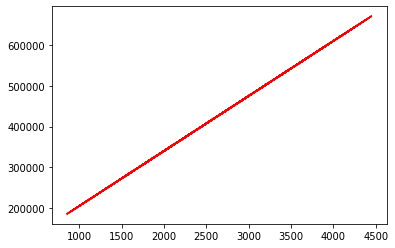

In [ ]:
# Plot the data

# Sample the range from minimum to maximum sqft to get 100 points

mins = np.min(x_sqft)
maxs = np.max(x_sqft)

sample = np.random.randint(mins, maxs, 100)
print (sample)


# Apply the best fit equation to each sample point and plot the result

y_values = sample*134.52528772 + 71270.49244872917

plt.plot(sample, y_values, 'r-')

print (1600*134.52528772 + 71270.49244872917)

#print (data_array[data_array[0]==1600])

1: Given these parameters, how much should a house with 1600 sqft cost?

286510.9528007292

2: From the dataset, how much did a house with 1600 sqft actually cost?

For 329,900 and 399,900

In [ ]:
xx_shaped = x_sqft.reshape(-1, 1)
print(y_value[np.where(xx_shaped == 1600)[0]])
print(y_value[np.where(xx_shaped == 1600)[1]])

[329900.]
[399900.]


3: Assuming the current 1600 sqft house would sell for as much as the historical one, how much money would we have lost? What percentage of the total price is this?

329,900 - 286,510.9528007292 = 43,389.0472 and 
399,900 - 286,510.9528007292 = 113,389.047 lost. A 13.1521816% and 28.3543503% respectfully.  

Now compare the values for 𝑚 and 𝑏 that sklearn generated in the tutorial notebook with the values that you found just now with your function. Hopefully they match.

In [ ]:
print("Sklearn:",134.52528772, 71270.492448729)
print("My function:",mm,bb)

Sklearn: 134.52528772 71270.492448729
My function: 134.5252877202413 71270.49244872917


---
Remember how despite adding an entire new variable, the $R^2$ value barely increased? Let's investigate this further by finding the correlation ($R^2$) value for a regression of square footage vs. number of bedrooms.

In [ ]:
import sklearn.linear_model as lm

# Get the number of bedrooms
x_rooms = data_array[:,1]

# Reshape the data to the required format for lm's fit function
x_rooms_shaped = x_rooms.reshape(-1,1)
x_sqft_shaped = x_sqft.reshape(-1,1)

# Concatenate the data into a single array
#x_combined = np.concatenate((x_sqft_shaped,x_rooms_shaped),axis=1)

# Create a new linear regression model
model_2d = lm.LinearRegression()

# Run fit for two independent variables
housepredictor_2d = model_2d.fit(x_sqft_shaped, x_rooms_shaped)

#print(housepredictor.score(x_sqft_shaped,y_value))
print( housepredictor_2d.score(x_sqft_shaped, x_rooms_shaped) )

0.3135632699338188


Do 2 variables have to be verry correlated to reduce their effectiveness together?

Yes because if 2 variables are very correlated, then the addition of another variable will not affect the other variables. This can be seen above where the addition of the new variable, number of rooms, didn't affect the value of the square error loss function, thus it didn't greatly change the accuracy or the line.

## Logistic

We are going to predict wheter or not someone has breast cancer using Logistic Regression on sklearn's breast cancer dataset. It is up to you to decide what features to get the best results.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.metrics import accuracy_score
data = load_breast_cancer()

X_cols = data['data']
Y_cols = data['target']

# YOUR CODE HERE
train_size=0.02
train_arr = []
val_arr = []
size_arr = []

for i in range(96):
    X_train, X_val, y_train, y_val = train_test_split(X_cols, Y_cols, train_size=train_size, random_state=1)
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)

    y_train_pred=logreg.predict(X_train)
    train_arr.append(accuracy_score(y_train, y_train_pred)*100)
    y_val_pred=logreg.predict(X_val)
    val_arr.append(accuracy_score(y_val,y_val_pred)*100)
    
    size_arr.append(train_size)
    train_size+=0.01

data


/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

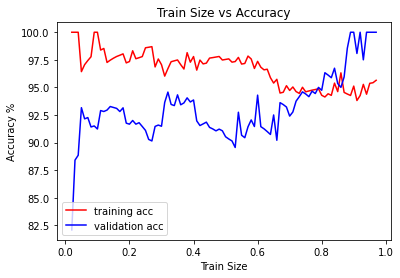

In [ ]:
from matplotlib import pyplot as plt
plt.plot(size_arr, train_arr, 'r-', label="training acc")
plt.plot(size_arr, val_arr, 'b-', label="validation acc") 
#plt.plot(val_arr, train_arr, 'r-') 
plt.xlabel('Train Size')
plt.ylabel('Accuracy %')
plt.title('Train Size vs Accuracy')
plt.legend(loc="lower left")

Test your logistical regression! You must get an accuracy of > 80%

In [ ]:
from sklearn.metrics import accuracy_score
# YOUR CODE HERE
y_train_pred=logreg.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=logreg.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  94.43447037701975
Validation Accuracy is  100.0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=16d23bb3-58ad-4c2e-92d0-51e8a748e16b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>